# Colour revolution

## View 

In [1]:
import pandas as pd

In [65]:
df=pd.read_csv("rev_s.csv")

In [66]:
df.head()

,Unnamed: 0,country,start_date,end_date,reason,success,participants_max_min,participants_max_max,participants_av,population,cur_leader_elected,cur_elected_bd,PFI,PFI_pos,deceased,injured,days
0,0,Portugal,1974-04-25,1974-04-25,politics,True,300.0,300.0,300.0,8.630000e+06,1958-06-08,1894-11-19,NaN,NaN,4,40,0.0
1,1,Philippines,1986-02-22,1986-02-25,election,False,2000000.0,2000000.0,2000000.0,5.576000e+07,1965-11-09,1917-09-11,NaN,NaN,15,20,3.0
2,2,China,1989-04-15,1989-06-04,politics,True,NaN,NaN,NaN,1.119000e+09,1987-01-15,1919-10-17,NaN,NaN,7000,5000,50.0
3,3,Czechoslovakia,1989-11-17,1989-12-29,politics,True,10000.0,300000.0,54772.0,1.560000e+07,1975-05-29,1913-01-10,NaN,NaN,0,500,42.0
4,4,Yugoslavia,2000-09-29,2000-10-06,election,True,10000.0,10000.0,10000.0,2.200000e+07,1989-05-08,1941-08-20,NaN,NaN,1,100,7.0


In [67]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               34 non-null     object 
 1   start_date            34 non-null     object 
 2   end_date              34 non-null     object 
 3   reason                34 non-null     object 
 4   success               31 non-null     object 
 5   participants_max_min  31 non-null     float64
 6   participants_max_max  31 non-null     float64
 7   participants_av       31 non-null     float64
 8   population            34 non-null     float64
 9   cur_leader_elected    34 non-null     object 
 10  cur_elected_bd        34 non-null     object 
 11  PFI                   29 non-null     float64
 12  PFI_pos               29 non-null     float64
 13  deceased              34 non-null     int64  
 14  injured               34 non-null     int64  
 15  days                  34 

In [68]:
df.describe()

,participants_max_min,participants_max_max,participants_av,population,PFI,PFI_pos,deceased,injured,days
count,3.100000e+01,3.100000e+01,3.100000e+01,3.400000e+01,29.000000,29.000000,34.000000,34.000000,34.000000
mean,2.990419e+05,4.592032e+05,3.432776e+05,1.051625e+08,47.855172,125.689655,304.294118,1471.794118,146.941176
std,5.938797e+05,7.218594e+05,6.107768e+05,2.905233e+08,21.799544,35.321082,1238.742361,3840.929857,251.071515
min,3.000000e+02,3.000000e+02,3.000000e+02,2.073000e+06,17.330000,61.000000,0.000000,0.000000,0.000000
25%,2.000000e+04,2.750000e+04,2.250000e+04,5.234250e+06,29.990000,102.000000,0.000000,22.500000,18.000000
50%,8.000000e+04,1.000000e+05,1.000000e+05,1.880000e+07,45.750000,132.000000,0.000000,85.000000,47.500000
75%,1.250000e+05,5.000000e+05,2.118035e+05,5.084250e+07,61.330000,154.000000,11.500000,462.500000,106.500000
max,2.000000e+06,2.400000e+06,2.079423e+06,1.344000e+09,94.560000,175.000000,7000.000000,20000.000000,1191.000000


## Modify

In [69]:
df['succes'] = np.where(df['success'] == True, "Yes", 'No')

In [70]:
#df.drop(['Unnamed: 0'],axis=1,inplace=True)
#list=['start_date','end_date','cur_leader_elected','cur_elected_bd']
df['start_date']=pd.to_datetime(df['start_date'])
df['end_date']=pd.to_datetime(df['end_date'])
df['cur_leader_elected']=pd.to_datetime(df['cur_leader_elected'])
df['cur_elected_bd']=pd.to_datetime(df['cur_elected_bd'])
df['days']=((df['end_date']-df['start_date'])/np.timedelta64(1,'D'))
df['day_power']=(df['start_date']-df['cur_leader_elected'])/np.timedelta64(1,'D')

## Visualization

<p> Histogram of distribution of days depending on success <p>

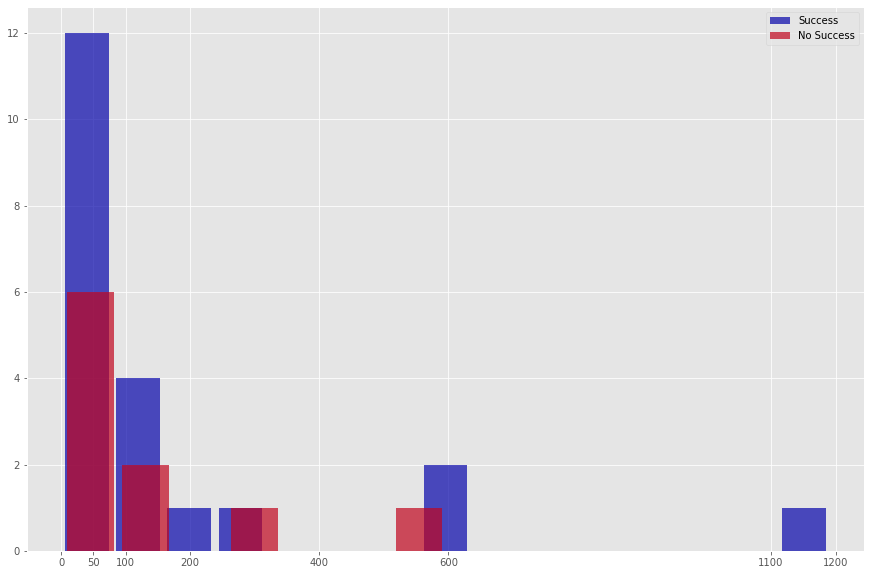

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns 
%matplotlib inline
plt.style.use("ggplot")
plt.figure(figsize=(15,10))
ax=plt.axes()
ax.hist(df[df['success']==True]['days'], color='#0504aa',  alpha=0.7,   bins='auto', rwidth=0.85,label="Success")
ax.hist(df[df['success']==False]['days'], color='#c1051e',  alpha=0.7,   bins='auto', rwidth=0.85,label="No Success")
ax.set_xticks([0,50,100,200,400,600,1100,1200])
ax.legend()

In [125]:
#df.groupby("reason")['reason'].count() 
#def group_fun(name):
#     print(df[[name,"success"]].groupby([name], as_index=False).mean().sort_values(by=name, ascending=False))
#     print("-"*38)
# df[['reason',"success"]].groupby(['success'], as_index=False).mean().sort_values(by=name, ascending=False)

In [51]:
# plt.figure(figsize=(15,15))
# sns.boxplot(x="reason", y="days", hue="success",data=df)
# from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
# import plotly
# import plotly.graph_objs as go

# init_notebook_mode(connected=True)
# data = []

# for genre in df["reason"].unique():
#     data.append(
#         go.Box(y=df[df["reason"]==genre]["days"], name=genre)
#     )

# # визуализируем данные
# iplot(data, show_link = False)
import plotly.express as px

fig = px.box(data_frame=df.dropna(), x="reason", y="days",color='success')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

<p> Box plot of days depending on success <p>

In [53]:
fig = px.box(data_frame=df.dropna(), y="days", x='success')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()

In [74]:
fig = px.box(data_frame=df.dropna(), y="day_power", x='success')
fig.update_traces(quartilemethod="exclusive") # or "inclusive", or "linear" by default
fig.show()